IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

*LABADY Sterley Gilbert - GOJAK Zlatan*

Ce projet peut être fait (c'est même recommandé) en binôme. Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - mars 2022


<font size="+1" color="RED"><b>Date de rendu : vendredi 25 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur:
- les données Bases_IADS : cela correspond à un problème de classification binaire
- les données Bases_IADS_multiclasses : cela correspond à un problème de classification multiclasses

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivantes:

          -- ce_notebook.ipynb
          -- Bases_IADS/ 
              -- README.txt
              -- train.csv
              -- test.csv
              -- eval.csv
              -- names.csv
          -- Bases_IADS_multiclasses/
              -- README.txt
              -- train_multi.csv
              -- test_multi.csv
              -- eval_multi.csv
              -- names_multi.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.


Les fichiers de chaque répertoire correspondent à:
- fichier README.txt : donne des explications sur le contenu du répertoire
- fichier train*.csv : base d'apprentissage à utiliser pour construire le classfieur
- fichier test*.csv : base de test pour évaluer vous même le classifieur construit. Les exemples de ce fichier NE DOIVENT PAS être utilisés pour l'apprentissage du classifieur.
- fichier eval*.csv : fichier d'évaluation du classifieur (voir ci-dessous).

## Travail à faire

Pour chaque ensemble de données:
- les 2 algorithmes d'apprentissage knn et perceptron doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations pourront être : comparaison des taux de bonne classification apprentissage / test (avec validation croisée), visualisation, etc.
- de plus, un fichier `eval.csv` est fourni. Ce fichier contient des descriptions associées à un "faux" label. Dans votre compte-rendu, vous devez fournir un fichier CSV qui donne, pour chaque exemple du fichier `eval.csv`la classe trouvée par votre meilleur classifieur. Ainsi, le fichier CSV à rendre doit comporter 2 colonnes et autant de lignes que d'exemples (une ligne par exemple du fichier eval):<br>
            IDENTIFIANT;CLASSE_TROUVEE_POUR_CET_EXEMPLE
            ...
Le résultat de classification vous sera donné en retour (nous connaissons la vraie classe des exemples de ce fichier...).

Vos **expérimentations doivent être expliquées** (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.


Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.



## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement)
- ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !
- un fichier CSV dont le nom est de la forme: *projet-1-Nom1_Nom2.csv* (sur le modèle du nom du notebook) qui donne la classe de chaque exemple du fichier `eval.csv` trouvée par votre classifieur.


**Remarque**: en considérant que les algorithmes knn et perceptron ont été réalisés lors des séances de TME 1 à 6, le travail demandé pour ce projet correspond à, au plus, une séance complète de TME.

In [114]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import csv, sys
import copy 
from numpy.core.fromnumeric import size
%matplotlib inline  
# Les instructions suivantes sont TRES utile pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [115]:
class Classifier:
    def __init__(self, input_dimension):
        raise NotImplementedError("Please Implement this method")
    def train(self, desc_set, label_set):
        raise NotImplementedError("Please Implement this method")
    def score(self,x):
        raise NotImplementedError("Please Implement this method")
    def predict(self, x):
        raise NotImplementedError("Please Implement this method")
    def accuracy(self, desc_set, label_set):
        count=0
        for i in range(len(label_set)):
              if self.predict(desc_set[i]) == label_set[i]:
                    count+=1
        return count/len(label_set)

In [116]:
#les données Bases_IADS : cela correspond à un problème de classification binaire
# Lecture du fichier csv pour le train
data = pd.read_csv("Bases_IADS/train.csv", delimiter=";", header=None)
# Definitions des colums
data_columns = [c for c in data.columns]
# Initialisation des données d'apprentissage
data_desc = np.array(data[data_columns[1:-1]])
# Initialisation des labels
data_label = np.array(data[data_columns[-1]])
# Lecture du fichier csv pour le test
data_test = pd.read_csv("Bases_IADS/test.csv", delimiter=";", header=None)
# Definitions des colums
data_test_columns = [c for c in data_test.columns]
# Initialisation des données de test
data_test_desc = np.array(data_test[data_test_columns[1:-1]])
# Initialisation des labels
data_test_label = np.array(data_test[data_test_columns[-1]])

In [117]:
#les données Bases_IADS_multiclasses : cela correspond à un problème de classification multiclass
# Lecture du fichier csv pour le train
data = pd.read_csv("Bases_IADS_multiclasses/train_multi.csv", delimiter=";", header=None)
# Definitions des colums
data_columns = [c for c in data.columns]
# Initialisation des données d'apprentissage
data_desc_m = np.array(data[data_columns[1:-1]])
# Initialisation des labels
data_label_m = np.array(data[data_columns[-1]])
# Lecture du fichier csv pour le test
data_test = pd.read_csv("Bases_IADS_multiclasses/test_multi.csv", delimiter=";", header=None)
# Definitions des colums
data_test_columns = [c for c in data_test.columns]
# Initialisation des données de test
data_test_desc_m = np.array(data_test[data_test_columns[1:-1]])
# Initialisation des labels
data_test_label_m = np.array(data_test[data_test_columns[-1]])

In [118]:
def crossval(X, Y, n, i):
    start, end = i*int(len(Y)/n), (i+1)*int(len(Y)/n)
    Xtrain = np.delete(X, np.s_[start:end], axis=0)
    Ytrain = np.delete(Y, np.s_[start:end], axis=0)
    Xtest = X[start:end]
    Ytest = Y[start:end]
    return Xtrain, Ytrain, Xtest, Ytest

In [119]:
def crossval_strat(X, Y, n, i):
    label_unique = []
    for l in Y:
        if l not in label_unique:
            label_unique.append(l)
    listXtrain = []
    listYtrain = []
    listXtest = []
    listYtest = []
    for l in label_unique:
        Xtraini, Ytraini, Xtesti, Ytesti = crossval(X[Y==l], Y[Y==l], n, i)
        listXtrain.append(Xtraini)
        listYtrain.append(Ytraini)
        listXtest.append(Xtesti)
        listYtest.append(Ytesti)
    Xtrain = np.concatenate(listXtrain)
    Ytrain = np.concatenate(listYtrain)
    Xtest = np.concatenate(listXtest)
    Ytest = np.concatenate(listYtest)
    return Xtrain, Ytrain, Xtest, Ytest

# A) KNN

# 1) KNN Données Bases_IADS

In [120]:
class ClassifierKNN_Multi(Classifier):
    def __init__(self, input_dimension, k):
        self.input_dimension = input_dimension
        self.k=k
    def score(self,x):
        size = np.linalg.norm(self.desc_set-x, axis=1)
        argsort = np.argsort(size)
        dict_score = {}
        lab = []
        for i in argsort[:self.k]:
            the_lab = self.label_set[i]
            if the_lab not in lab:
                lab.append(the_lab)
                dict_score[the_lab] = 1
            else:
                dict_score[the_lab] = dict_score[the_lab] + 1
        return dict_score, lab
    def predict(self, x):
        dict_score, lab = self.score(x)
        ret = lab[0]
        max_score = dict_score[ret]
        for l in lab:
            if dict_score[l] > max_score:
                ret = l
        return ret
    def train(self, desc_set, label_set):      
        self.desc_set = desc_set
        self.label_set = label_set

In [121]:
# Création d'un classifieur KNN de dimension len(data_desc[0]):
un_KNN = ClassifierKNN_Multi(len(data_desc[0]),1)
# Par définition, ce classifieur n'a pas besoin d'entraînement
un_KNN.train(data_desc,data_label)
# Affichage du taux de bonne classification   
print("Accuracy: ",un_KNN.accuracy(data_test_desc, data_test_label))

Accuracy:  0.935


Loading... 5 %
Loading... 15 %
Loading... 25 %
Loading... 35 %
Loading... 45 %
Loading... 55 %
Loading... 65 %
Loading... 75 %
Loading... 85 %
Loading... 95 %


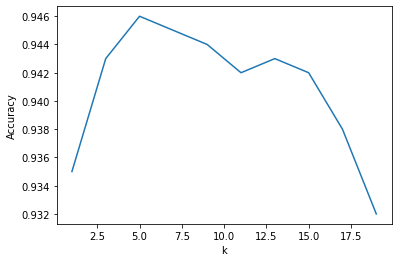

In [122]:
# Recherche du meilleur k
# on stocke les accuracies dans une liste :
accuracies = []
# seuil max des valeurs de k à regarder:
seuil_k = 20
# toutes les valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,2)]
for i in (valeurs_k):
    print("Loading...",int(i/seuil_k*100),"%")
    ClassKNN = ClassifierKNN_Multi(len(data_desc[0]), i)
    ClassKNN.train(data_desc, data_label)
    accuracies.append(ClassKNN.accuracy(data_test_desc,data_test_label))
# Tracé de la variation de l'accuracy en fonction de la valeur de k:
plt.plot(valeurs_k, accuracies)  
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.show()

Pour trouver le meilleur K, nous avons calculé le taux d'accuracy de notre classifier sur nos données de test avec plusieurs K de 0 à 20 (Impairs). Nous pouvons clairement remarquer que le meilleur taux d'accuracy s'obtient avec K=5. Par la suite nous pouvons garder K=5 construisant ainsi le meilleur ClassierKNN.

In [123]:
# Création d'un classifieur KNN de dimension len(data_desc[0]):
best_KNN = ClassifierKNN_Multi(len(data_desc[0]),5)
# Par définition, ce classifieur n'a pas besoin d'entraînement
best_KNN.train(data_desc,data_label)
# Affichage du taux de bonne classification   
print("Best Accuracy: ",best_KNN.accuracy(data_test_desc, data_test_label))

Best Accuracy:  0.946


# Validation Croisiée

In [124]:
# Validation Croisiée
niter = 10
perf = []
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(data_desc, data_label, niter, i)
    if len(Xtest) != 0:
        best_KNN = ClassifierKNN_Multi(len(data_desc[0]),5)
        best_KNN.train(Xapp, Yapp)
        perf.append(best_KNN.accuracy(Xtest, Ytest))
        print("--- Loading...",int(i/niter*100),"%")
print("Perf ",perf)

--- Loading... 0 %
--- Loading... 10 %
--- Loading... 20 %
--- Loading... 30 %
--- Loading... 40 %
--- Loading... 50 %
--- Loading... 60 %
--- Loading... 70 %
--- Loading... 80 %
--- Loading... 90 %
Perf  [0.96, 0.96, 0.98, 0.96, 0.99, 0.93, 0.92, 0.92, 0.91, 0.92]


# 2) KNN Données Bases_IADS_multiclasses

In [125]:
# Création d'un classifieur KNN de dimension len(data_desc[0]):
un_KNN = ClassifierKNN_Multi(len(data_desc_m[0]),1)
# Par définition, ce classifieur n'a pas besoin d'entraînement
un_KNN.train(data_desc_m,data_label_m)
# Affichage du taux de bonne classification   
print("Accuracy: ",un_KNN.accuracy(data_test_desc_m, data_test_label_m))

Accuracy:  0.8925


Loading... 5 %
Loading... 15 %
Loading... 25 %
Loading... 35 %
Loading... 45 %
Loading... 55 %
Loading... 65 %
Loading... 75 %
Loading... 85 %
Loading... 95 %


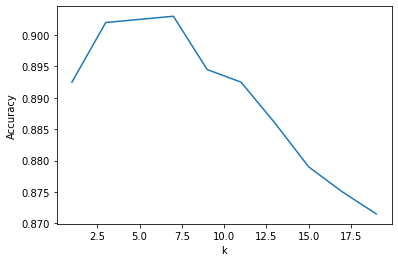

In [126]:
# Recherche du meilleur k
# on stocke les accuracies dans une liste :
accuracies = []
# seuil max des valeurs de k à regarder:
seuil_k = 20
# toutes les valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,2)]
for i in (valeurs_k):
    print("Loading...",int(i/seuil_k*100),"%")
    ClassKNN = ClassifierKNN_Multi(len(data_desc_m[0]), i)
    ClassKNN.train(data_desc_m, data_label_m)
    accuracies.append(ClassKNN.accuracy(data_test_desc_m,data_test_label_m))
# Tracé de la variation de l'accuracy en fonction de la valeur de k:
plt.plot(valeurs_k, accuracies)  
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.show()

Pour trouver le meilleur K, nous avons calculé le taux d'accuracy de notre classifier sur nos données de test avec plusieurs K de 0 à 20 (Impairs). Nous pouvons clairement remarquer que le meilleur taux d'accuracy s'obtient avec K=7. Par la suite nous pouvons garder K=7 construisant ainsi le meilleur ClassierKNN_Multi.

In [127]:
# Création d'un classifieur KNN de dimension len(data_desc[0]):
best_KNN_m = ClassifierKNN_Multi(len(data_desc_m[0]),7)
# Par définition, ce classifieur n'a pas besoin d'entraînement
best_KNN_m.train(data_desc_m,data_label_m)
# Affichage du taux de bonne classification   
print("Best Accuracy: ",best_KNN_m.accuracy(data_test_desc_m, data_test_label_m))

Best Accuracy:  0.903


# Validation Croisiée

In [128]:
# Validation Croisiée
niter = 10
perf = []
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(data_desc_m, data_label_m, niter, i)
    if len(Xtest) != 0:
        best_KNN_m = ClassifierKNN_Multi(len(data_desc_m[0]),7)
        best_KNN_m.train(Xapp, Yapp)
        perf.append(best_KNN_m.accuracy(Xtest, Ytest))
        print("--- Loading...",int(i/niter*100),"%")
print("Perf ",perf)

--- Loading... 0 %
--- Loading... 10 %
--- Loading... 20 %
--- Loading... 30 %
--- Loading... 40 %
--- Loading... 50 %
--- Loading... 60 %
--- Loading... 70 %
--- Loading... 80 %
--- Loading... 90 %
Perf  [0.9, 0.915, 0.895, 0.905, 0.91, 0.885, 0.91, 0.875, 0.855, 0.895]


# B) Perceptron

# 1) PERCEPTRON Données Bases_IADS

In [129]:
class ClassifierPerceptron(Classifier):
    def __init__(self, input_dimension, learning_rate, init=0):
        self.input_dimension = input_dimension
        self.learning_rate = learning_rate
        self.init = init
        res = []
        if init == 0:
            self.w_de_base = np.asarray(np.zeros(self.input_dimension))
        elif init == 1:
            for i in range(self.input_dimension):
                res.append((2*i - 1)*0.001)
            self.w_de_base = np.asarray(res)
    def train_step(self, desc_set, label_set):
        liste_indice = np.random.permutation(len(desc_set))
        for i in liste_indice:
            x=desc_set[i]
            y=label_set[i]
            pred = self.predict(x)
            if y != pred:
                self.w_de_base = self.w_de_base + self.learning_rate*x*y
        return self.w_de_base
    def train(self, desc_set, label_set, niter_max=100, seuil=0.001):
        ret = []  
        i = 1
        w_old = self.train_step(desc_set, label_set)
        while i < niter_max:
            w_new = self.train_step(desc_set, label_set)
            d = np.linalg.norm(w_old - w_new)
            ret.append(d)
            w_old = w_new.copy()
            i += 1
        ret.pop(0)
        return ret
    def score(self,x):
        score = 0
        for i in range(len(x)):
            score += self.w_de_base[i] * x[i]
        return score
    def predict(self, x):
        score = self.score(x)
        return 1 if score >= 0.0 else -1

Apprentissage pas à pas et variation d'accuracy

Loading... 0 %
Loading... 20 %
Loading... 40 %
Loading... 60 %
Loading... 80 %


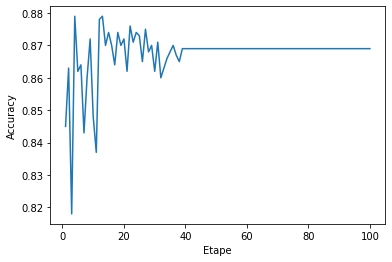

Accuracy finale :  0.869


In [130]:
# Création d'un perceptron avec initialisation à 0 et le learning_rate ci-dessous:
learning_rate = 0.01
perceptron1 = ClassifierPerceptron(len(data_desc[0]), learning_rate, 0)
# Apprentissage pas à pas du perceptron et mémorisation de l'accuracy à chaque étape:
# Liste qui va servir à mémoriser les accuracy du perceptron à chaque étape:
val_acc = []
# Réalisation de N itérations 
N = 100
for i in range(N):
    if int(i/N*100)%20 == 0:
        print("Loading...",int(i/N*100),"%")
    perceptron1.train_step(data_desc, data_label)
    val_acc.append(perceptron1.accuracy(data_test_desc, data_test_label))
# Traçage de la courbe des variations d'accuracy
plt.plot(range(1, len(val_acc)+1),val_acc)
plt.ylabel('Accuracy')
plt.xlabel("Etape")
plt.show()
print("Accuracy finale : ", perceptron1.accuracy(data_test_desc,data_test_label))

Apprentissage et affichage de la convergence

Loading... Ça peut durer quelques secondes...
Nb iterations réalisées:  100


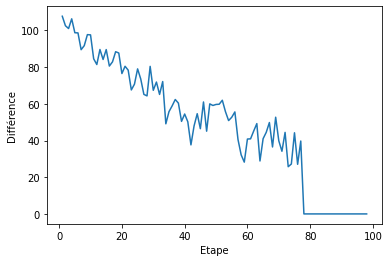

Accuracy finale :  0.875


In [131]:
# Création d'un perceptron avec initialisation à 0 et le learning_rate ci-dessous:
learning_rate = 0.01
perceptron2 = ClassifierPerceptron(len(data_desc[0]), learning_rate, 0)
print("Loading... Ça peut durer quelques secondes...")
# Apprentissage du perceptron jusqu'à convergence
les_variations = perceptron2.train(data_desc, data_label, niter_max=100)
print("Nb iterations réalisées: ",100)
# Traçage de la courbe des variations
plt.plot(range(1,len(les_variations)+1),les_variations)  
plt.ylabel('Différence')
plt.xlabel("Etape")
plt.show()
print("Accuracy finale : ", perceptron2.accuracy(data_test_desc,data_test_label))

Impact du learning rate

Analyse : Nous pouvons conclure que niter_max = 80 suffit pour faire converger notre algorithme.
A 80 l'accuracy se stabilise et la différence en les W est presque nulle.

In [132]:
# Best Perceptron
learning_rate = 0.01
best_perceptron = ClassifierPerceptron(len(data_desc[0]), learning_rate, 0)
# Apprentissage du perceptron jusqu'à convergence
best_perceptron.train(data_desc, data_label, niter_max=80)
print("Accuracy finale : ", best_perceptron.accuracy(data_test_desc,data_test_label))

Accuracy finale :  0.875


# Validation Croisée

In [133]:
# Validation Croisiée
niter = 10
perf = []
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(data_desc, data_label, niter, i)
    if len(Xtest) != 0:
        best_perceptron = ClassifierPerceptron(len(data_desc[0]), learning_rate, 0)
        best_perceptron.train(Xapp, Yapp)
        perf.append(best_perceptron.accuracy(Xtest, Ytest))
        print("--- Loading...",int(i/niter*100),"%")
print("Perf ",perf)

--- Loading... 0 %
--- Loading... 10 %
--- Loading... 20 %
--- Loading... 30 %
--- Loading... 40 %
--- Loading... 50 %
--- Loading... 60 %
--- Loading... 70 %
--- Loading... 80 %
--- Loading... 90 %
Perf  [0.94, 0.86, 0.89, 0.92, 0.91, 0.87, 0.85, 0.85, 0.82, 0.89]


# 2) PERCEPTRON Données Bases_IADS_multiclasses

In [134]:
class ClassifierMultiOAA(Classifier):
    def __init__(self, ClassifBin, input_dimension, learning_rate, init=0):
        self.nCl= None;
        self.ClassifBin=ClassifBin
        self.List_classif=[]
        self.label_unic = []
    def train(self, desc_set, label_set, niter_max=100, seuil=0.001):
        for l in label_set:
            if l not in self.label_unic:
                self.label_unic.append(l)
        self.nCl = len(self.label_unic)
        print("label_unic", self.label_unic)
        for i in range(self.nCl):
            tmp_ClassifBin = copy.deepcopy(self.ClassifBin)
            self.List_classif.append(tmp_ClassifBin)
        print(self.nCl,"Classifiers")
        for i in range(len(self.label_unic)):
            label_set_i = copy.deepcopy(label_set)
            for j in range(len(label_set_i)):
                if(label_set_i[j]==self.label_unic[i]):
                    label_set_i[j]=1
                else:
                    label_set_i[j]=-1
            print("Loading...", int((i/len(self.label_unic))*100),"%")
            self.List_classif[i].train(desc_set, label_set_i)
            print("Classifier pour le label:", self.label_unic[i], "Trained !")
    def score(self,x):
        list_score=[]
        for k in range(len(self.List_classif)):
                list_score.append(self.List_classif[k].score(x))
        return list_score
    def predict(self, x):
        list_score = self.score(x)
        return self.label_unic[list_score.index(max(list_score))]

In [135]:
# Best Perceptron
learning_rate = 0.01
PerceptronBin = ClassifierPerceptron(len(data_desc_m[0]), learning_rate)
PerceptronMulti = ClassifierMultiOAA(PerceptronBin, len(data_desc_m[0]), learning_rate)
# Apprentissage du perceptron jusqu'à convergence
print("Loading... Ça peut durer quelques minutes...")
PerceptronMulti.train(data_desc_m, data_label_m)
print("Accuracy finale : ", PerceptronMulti.accuracy(data_test_desc_m,data_test_label_m))

Loading... Ça peut durer quelques minutes...
label_unic [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
10 Classifiers
Loading... 0 %
Classifier pour le label: 0 Trained !
Loading... 10 %
Classifier pour le label: 1 Trained !
Loading... 20 %
Classifier pour le label: 2 Trained !
Loading... 30 %
Classifier pour le label: 3 Trained !
Loading... 40 %
Classifier pour le label: 4 Trained !
Loading... 50 %
Classifier pour le label: 5 Trained !
Loading... 60 %
Classifier pour le label: 6 Trained !
Loading... 70 %
Classifier pour le label: 7 Trained !
Loading... 80 %
Classifier pour le label: 8 Trained !
Loading... 90 %
Classifier pour le label: 9 Trained !
Accuracy finale :  0.82


# Validation Croisiée

In [137]:

# Validation Croisiée
niter = 2
perf = []
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(data_desc_m, data_label_m, niter, i)
    if len(Xtest) != 0:
        PerceptronBin = ClassifierPerceptron(len(data_desc_m[0]), learning_rate)
        PerceptronMulti = ClassifierMultiOAA(PerceptronBin, len(data_desc_m[0]), learning_rate)
        PerceptronMulti.train(Xapp, Yapp)
        perf.append(PerceptronMulti.accuracy(Xtest, Ytest))
        print("--- Loading...",int(i/niter*100),"%")
print("Perf ",perf)

label_unic [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
10 Classifiers
Loading... 0 %
Classifier pour le label: 0 Trained !
Loading... 10 %
Classifier pour le label: 1 Trained !
Loading... 20 %
Classifier pour le label: 2 Trained !
Loading... 30 %
Classifier pour le label: 3 Trained !
Loading... 40 %
Classifier pour le label: 4 Trained !
Loading... 50 %
Classifier pour le label: 5 Trained !
Loading... 60 %
Classifier pour le label: 6 Trained !
Loading... 70 %
Classifier pour le label: 7 Trained !
Loading... 80 %
Classifier pour le label: 8 Trained !
Loading... 90 %
Classifier pour le label: 9 Trained !
--- Loading... 0 %
label_unic [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
10 Classifiers
Loading... 0 %
Classifier pour le label: 0 Trained !
Loading... 10 %
Classifier pour le label: 1 Trained !
Loading... 20 %
Classifier pour le label: 2 Trained !
Loading... 30 %
Classifier pour le label: 3 Trained !
Loading... 40 %
Classifier pour le label: 4 Trained !
Loading... 50 %
Classifier pour le label: 5 Trained !
Loadi

# C) EVAL ET CONCLUSION

Conclusion : Suite aux analyses des taux d'accuracy obtenus, nous pouvons remarquer que KNN est le meilleur Classifier pour ce Data_Set à la fois Binaire et MultiClass. Nous avons donc fait le choix du Classifier KNN pour classer nos données dans eval.

NB: Théoriquement le PerceptronKernel donne une meilleure accuracy car plus on a de descriptions, plus le classifier est performant. Mais vu le temps d'exécution par rapport à notre Dataset on a décidé d’utiliser le perceptron classique.

In [138]:
#les données Eval Binaire : cela correspond à un problème de classification binaire
# Lecture du fichier csv eval Binaire
eval_b = pd.read_csv("Bases_IADS/eval.csv", delimiter=";", header=None)
# Definitions des colums
eval_columns = [c for c in eval_b.columns]
# Initialisation des données 
eval_desc = np.array(eval_b[eval_columns[1:-1]])
# Initialisation des id
eval_id = np.array(eval_b[eval_columns[0]])

In [139]:
#les données Eval Multi : cela correspond à un problème de classification multiclass
# Lecture du fichier csv eval Binaire
eval_m = pd.read_csv("Bases_IADS_multiclasses/eval_multi.csv", delimiter=";", header=None)
# Definitions des colums
eval_columns_m = [c for c in eval_m.columns]
# Initialisation des données 
eval_desc_m = np.array(eval_m[eval_columns_m[1:-1]])
# Initialisation des id
eval_id_m = np.array(eval_m[eval_columns_m[0]])

In [140]:
#Création d'un fichier à partir de la liste IDENTIFIANT;CLASSE_TROUVEE_POUR_CET_EXEMPLE
def get_my_csv(nom_csv, my_tab):
    with open(nom_csv,'w',newline='') as e:  #Ouverture du fichier CSV en écriture
        ecrire=csv.writer(e)                      # préparation à l'écriture
        colums = ["IDENTIFIANT","CLASSE_TROUVEE_POUR_CET_EXEMPLE"]
        ecrire.writerow(colums)
        for ligne in my_tab:                           # Pour chaque ligne du tableau...  
            ecrire.writerow(ligne)                # ecrire cette nouvelle ligne      
    print("Fin création fichier csv")

In [141]:
print("Loading... Ça peut durer quelques minutes...")
best_KNN = ClassifierKNN_Multi(len(data_desc[0]),5)
best_KNN.train(data_desc,data_label)
tab_res_b = []
for i in range(len(eval_desc)):
    tmp = []
    tmp.append(eval_id[i])
    tmp.append(best_KNN.predict(eval_desc[i]))
    tab_res_b.append(tmp)

best_KNN_m = ClassifierKNN_Multi(len(data_desc_m[0]),7)
best_KNN_m.train(data_desc_m,data_label_m)
tab_res_m = []
for i in range(len(eval_desc_m)):
    tmp = []
    tmp.append(eval_id_m[i])
    tmp.append(best_KNN_m.predict(eval_desc_m[i]))
    tab_res_m.append(tmp)
get_my_csv("projet-1-resultats_eval-LABADY_GOJAK.csv", tab_res_b)
get_my_csv("projet-1-resultats_eval_multi-LABADY_GOJAK.csv", tab_res_m)

Loading... Ça peut durer quelques minutes...
Fin création fichier csv
Fin création fichier csv
